# Putri Azzahra (202331080)

## 1. Deteksi Warna Pada Citra

In [1]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

## Deklarasi File Gambar(JPG)

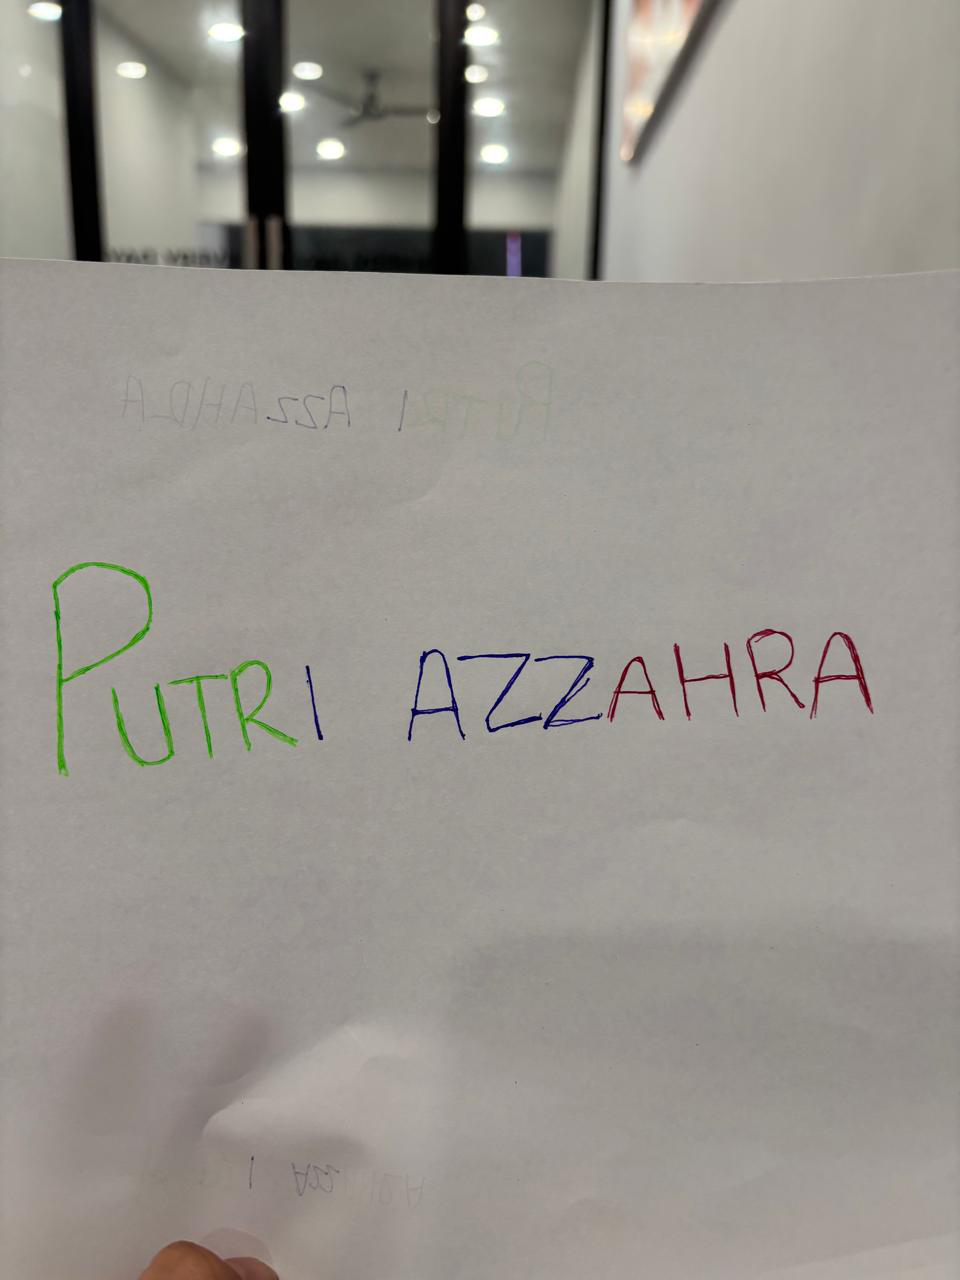

In [2]:
image_path = 'ara.jpg'
img = Image.open(image_path)
display(img)

## Convert File to RGB libary

In [3]:
img_rgb = img.convert('RGB')

img_array = np.array(img_rgb)

r_array = img_array[:, :, 0]
g_array = img_array[:, :, 1]
b_array = img_array[:, :, 2]

In [4]:
threshold = 50

In [5]:
r_mask = r_array > threshold
g_mask = g_array > threshold
b_mask = b_array > threshold

In [6]:
highlighted_putr = img_array.copy()
highlighted_iazz = img_array.copy()
highlighted_ahra = img_array.copy()


highlighted_putr[r_mask] = [128, 128, 128] #putr
highlighted_putr[~r_mask] = [0, 0, 0]

highlighted_iazz[b_mask] = [128, 128, 128] #iazz
highlighted_iazz[~b_mask] = [0, 0, 0]

highlighted_ahra[g_mask] = [128, 128, 128] #ahra
highlighted_ahra[~g_mask] = [0, 0, 0]

In [7]:
img_highlighted_putr = Image.fromarray(highlighted_putr)
img_highlighted_iazz = Image.fromarray(highlighted_iazz)
img_highlighted_ahra = Image.fromarray(highlighted_ahra)

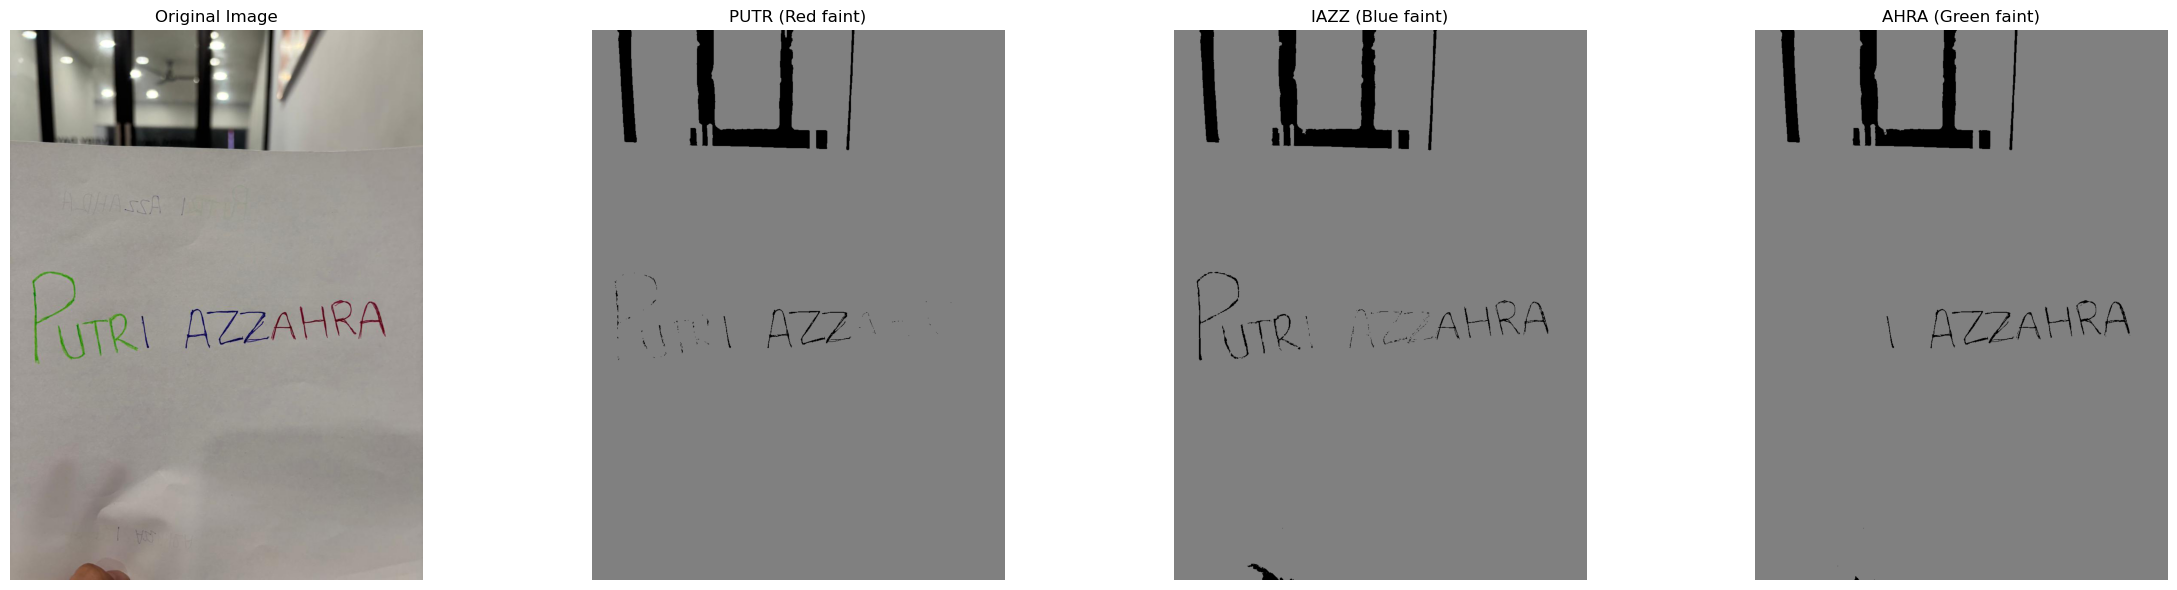

In [8]:
fig, ax = plt.subplots(1, 4, figsize=(24, 6))

ax[0].imshow(img_rgb)
ax[0].set_title("Original Image")
ax[0].axis('off')

ax[1].imshow(img_highlighted_putr)
ax[1].set_title("PUTR (Red faint)")
ax[1].axis('off')

ax[2].imshow(img_highlighted_iazz)
ax[2].set_title("IAZZ (Blue faint)")
ax[2].axis('off')

ax[3].imshow(img_highlighted_ahra)
ax[3].set_title("AHRA (Green faint)")
ax[3].axis('off')

plt.tight_layout()
plt.show()

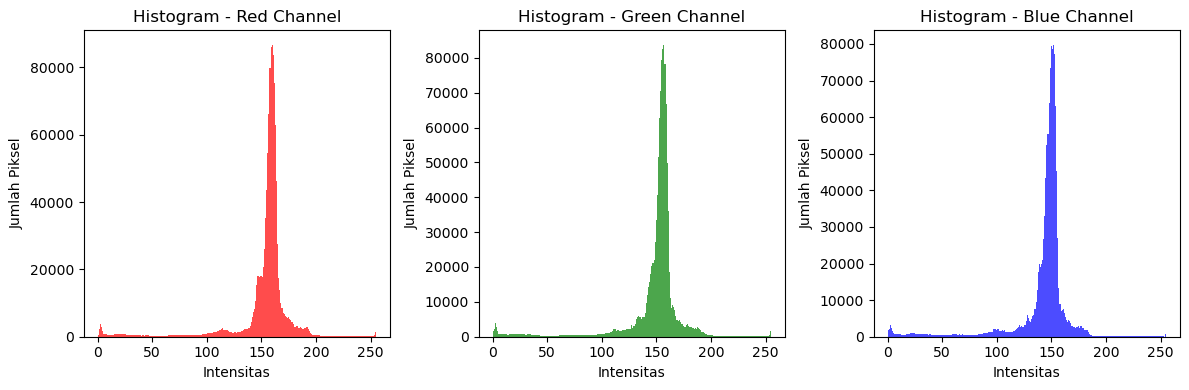

In [9]:
plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
plt.hist(r_array.ravel(), bins=256, color='Red', alpha=0.7)
plt.title('Histogram - Red Channel')
plt.xlabel('Intensitas')
plt.ylabel('Jumlah Piksel')

plt.subplot(1, 3, 2)
plt.hist(g_array.ravel(), bins=256, color='Green', alpha=0.7)
plt.title('Histogram - Green Channel')
plt.xlabel('Intensitas')
plt.ylabel('Jumlah Piksel')

plt.subplot(1, 3, 3)
plt.hist(b_array.ravel(), bins=256, color='Blue', alpha=0.7)
plt.title('Histogram - Blue Channel')
plt.xlabel('Intensitas')
plt.ylabel('Jumlah Piksel')

plt.tight_layout()
plt.show()

In [10]:
none_mask = ~(r_mask | g_mask | b_mask)
blue_mask = b_mask & ~(r_mask | g_mask)
red_blue_mask = r_mask & b_mask & ~g_mask
red_green_blue_mask = r_mask & g_mask & b_mask

In [11]:
highlighted_none = img_array.copy()
highlighted_none[~none_mask] = [0, 0, 0]

highlighted_blue = img_array.copy()
highlighted_blue[~blue_mask] = [0, 2, 2]

highlighted_red_blue = img_array.copy()
highlighted_red_blue[~red_blue_mask] = [0, 2, 2]

highlighted_red_green_blue = img_array.copy()
highlighted_red_green_blue[~red_green_blue_mask] = [0, 0, 0]

In [12]:
img_highlighted_none = Image.fromarray(highlighted_none)
img_highlighted_blue = Image.fromarray(highlighted_blue)
img_highlighted_red_blue = Image.fromarray(highlighted_red_blue)
img_highlighted_red_green_blue = Image.fromarray(highlighted_red_green_blue)

## 2. Ambang batas dari yang terkecil sampai terbesar

In [13]:
import cv2
img = cv2.imread('ara.jpg')  # Gambar dibaca dalam format BGR
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

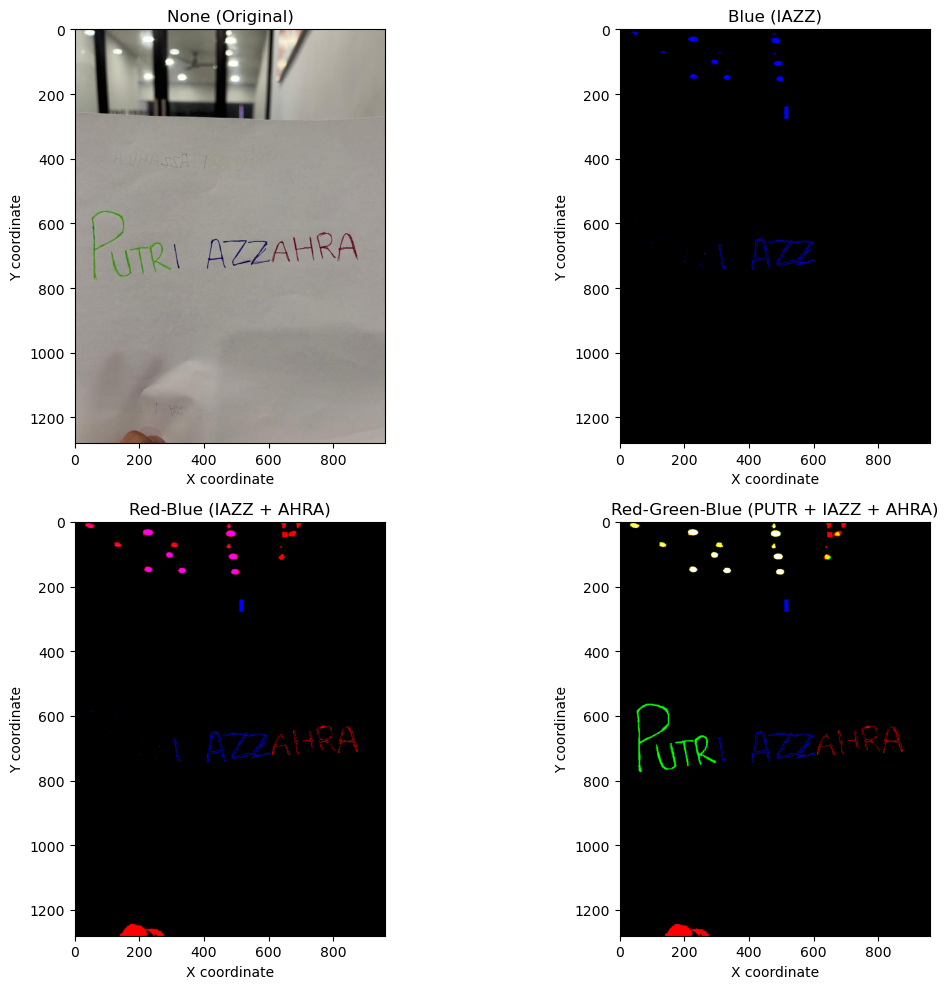

In [14]:
highlight_blue = np.zeros_like(img_rgb)
highlight_green = np.zeros_like(img_rgb)
highlight_red = np.zeros_like(img_rgb)

# Ambil channel
r = img_rgb[:, :, 0]
g = img_rgb[:, :, 1]
b = img_rgb[:, :, 2]

# Buat masker berdasarkan dominasi warna
mask_blue = (b > 100) & (b > r + 5) & (b > g + 5)
mask_green = (g > 100) & (g > r + 30) & (g > b + 30)
mask_red = (r > 100) & (r > g + 30) & (r > b + 30)

# Terapkan ke masing-masing channel
highlight_blue[mask_blue] = [0, 0, 255]     # Hanya biru
highlight_green[mask_green] = [0, 255, 0]   # Hanya hijau
highlight_red[mask_red] = [255, 0, 0]       # Hanya merah

# Gabungan sesuai permintaan
highlight_none = img_rgb.copy()
highlight_red_blue = cv2.add(highlight_red, highlight_blue)
highlight_red_green_blue = cv2.add(highlight_red, cv2.add(highlight_green, highlight_blue))

# Plotting
fig, ax = plt.subplots(2, 2, figsize=(12, 10))

ax[0, 0].imshow(highlight_none)
ax[0, 0].set_title("None (Original)")

ax[0, 1].imshow(highlight_blue)
ax[0, 1].set_title("Blue (IAZZ)")

ax[1, 0].imshow(highlight_red_blue)
ax[1, 0].set_title("Red-Blue (IAZZ + AHRA)")

ax[1, 1].imshow(highlight_red_green_blue)
ax[1, 1].set_title("Red-Green-Blue (PUTR + IAZZ + AHRA)")

# Set koordinat
for a in ax.flatten():
    a.set_xlabel('X coordinate')
    a.set_ylabel('Y coordinate')
    a.set_xlim(0, img_rgb.shape[1])
    a.set_ylim(img_rgb.shape[0], 0)

plt.tight_layout()
plt.show()